In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [ ]:
# all_stocks_5yr.csv
import pandas as pd
data = pd.read_csv('My Drive/all_stocks_5yr.csv')
data.shape

(619040, 7)

In [ ]:
# Top Five rows
data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [ ]:
data.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name'], dtype='object')

In [ ]:
### How many company's data we have here?
data.Name.nunique()

505

In [ ]:
## Selecting the data XRX
df = data[data['Name']=='XRX']
df.shape

(1259, 7)

In [ ]:
df.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name'], dtype='object')

In [ ]:
#select the columns date and close price
df = df[['date','close']]
df

,date,close
611486,2013-02-08,31.84
611487,2013-02-11,31.96
611488,2013-02-12,31.84
611489,2013-02-13,32.00
611490,2013-02-14,32.12
...,...,...
612740,2018-02-01,32.75
612741,2018-02-02,31.63
612742,2018-02-05,31.38
612743,2018-02-06,30.85


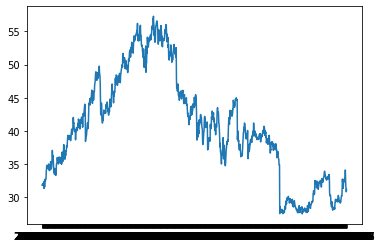

In [ ]:
# Line plot
import matplotlib.pyplot as plt
plt.plot(df['date'],df['close'])

In [ ]:
### Missing values in the data
df.isnull().sum()

date     0
close    0
dtype: int64

In [ ]:
df.date[:10]

611486    2013-02-08
611487    2013-02-11
611488    2013-02-12
611489    2013-02-13
611490    2013-02-14
611491    2013-02-15
611492    2013-02-19
611493    2013-02-20
611494    2013-02-21
611495    2013-02-22
Name: date, dtype: object

In [ ]:
## Preparing the data
## Features and target
## Input and output
## last 8 days data as input
## X -- [[d1-d8],[d10,d18],[d20,28]....]
## y -- [d9,d19,d29,...]

## X = [[d1-d8],[d2-d9],]
## y = [d9,d10]
X = [] ## input
y = [] ## ouput
for i  in range(df.shape[0]-8-1):   
  X.append(df['close'].iloc[i:i+8])# 0 -->[0:8], 1-->[1:9]
  y.append(df['close'].iloc[i+8])# 8,9,10
print(X[:2])

[611486    31.84
611487    31.96
611488    31.84
611489    32.00
611490    32.12
611491    31.88
611492    32.00
611493    31.44
Name: close, dtype: float64, 611487    31.96
611488    31.84
611489    32.00
611490    32.12
611491    31.88
611492    32.00
611493    31.44
611494    31.36
Name: close, dtype: float64]


In [ ]:
import numpy as np
X = np.array(X)

In [ ]:
df1  = pd.DataFrame(X,columns=['d1','d2','d3','d4','d5','d6','d7','d8'])
df1.head()

,d1,d2,d3,d4,d5,d6,d7,d8
0,31.84,31.96,31.84,32.00,32.12,31.88,32.00,31.44
1,31.96,31.84,32.00,32.12,31.88,32.00,31.44,31.36
2,31.84,32.00,32.12,31.88,32.00,31.44,31.36,32.48
3,32.00,32.12,31.88,32.00,31.44,31.36,32.48,31.56
4,32.12,31.88,32.00,31.44,31.36,32.48,31.56,32.08


In [ ]:
df1['d9'] = y
df1.head()

,d1,d2,d3,d4,d5,d6,d7,d8,d9
0,31.84,31.96,31.84,32.00,32.12,31.88,32.00,31.44,31.36
1,31.96,31.84,32.00,32.12,31.88,32.00,31.44,31.36,32.48
2,31.84,32.00,32.12,31.88,32.00,31.44,31.36,32.48,31.56
3,32.00,32.12,31.88,32.00,31.44,31.36,32.48,31.56,32.08
4,32.12,31.88,32.00,31.44,31.36,32.48,31.56,32.08,32.72


In [ ]:
df1.shape

(1250, 9)

In [ ]:
1251 * 0.8

1000.8000000000001

In [ ]:
## Train test split
X_train = df1.iloc[0:1000,0:8]
X_test = df1.iloc[1000:,0:8]
y_train =  df1['d9'][:1000]
y_test  = df1['d9'][1000:]
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1000, 8)
(1000,)
(250, 8)
(250,)


In [ ]:
## Sacling the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_sc = pd.DataFrame(sc.transform(X_train),columns = X_train.columns)
X_test_sc = pd.DataFrame(sc.transform(X_test),columns = X_train.columns)
X_train_sc.describe()

,d1,d2,d3,d4,d5,d6,d7,d8
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,5.102585e-16,6.763479e-16,-1.332268e-16,9.858780e-16,-7.824852e-16,2.264855e-16,1.313616e-15,7.513989e-16
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-2.377440e+00,-2.373860e+00,-2.370123e+00,-2.367039e+00,-2.364222e+00,-2.361249e+00,-2.358163e+00,-2.354997e+00
25%,-6.979239e-01,-6.964396e-01,-6.948884e-01,-6.936028e-01,-6.924220e-01,-6.911746e-01,-6.898867e-01,-6.885632e-01
50%,-1.776392e-01,-1.768038e-01,-1.759300e-01,-1.752015e-01,-1.745274e-01,-1.738148e-01,-1.730837e-01,-1.723310e-01
75%,7.686096e-01,7.682648e-01,7.679068e-01,7.676221e-01,7.673744e-01,7.671146e-01,7.668329e-01,7.665475e-01
max,2.143865e+00,2.141805e+00,2.139657e+00,2.137899e+00,2.136312e+00,2.134639e+00,2.132885e+00,2.131091e+00


In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,LSTM
model = Sequential()
# 250 cells
model.add(LSTM(250,input_shape=(8,1)))
# single neuron
model.add(Dense(1))
model.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 250)               252000    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 251       
Total params: 252,251
Trainable params: 252,251
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',loss='mse')

In [ ]:
X_test.shape

(250, 8)

In [ ]:
# number of records , time steps,Features
X_train_sc = X_train_sc.values.reshape(1000,8,1)
X_test_sc = X_test_sc.values.reshape(250,8,1)

In [ ]:
history = model.fit(X_train_sc,y_train,epochs=100,validation_data=(X_test_sc,y_test))

Train on 1000 samples, validate on 250 samples
Epoch 1/100
1000/1000 [==============================] - 2s 2ms/step - loss: 1506.7603 - val_loss: 72.4403
Epoch 2/100
1000/1000 [==============================] - 1s 968us/step - loss: 249.9579 - val_loss: 18.9518
Epoch 3/100
1000/1000 [==============================] - 1s 944us/step - loss: 82.9042 - val_loss: 95.3789
Epoch 4/100
1000/1000 [==============================] - 1s 948us/step - loss: 48.6782 - val_loss: 148.3192
Epoch 5/100
1000/1000 [==============================] - 1s 962us/step - loss: 44.2264 - val_loss: 167.9629
Epoch 6/100
1000/1000 [==============================] - 1s 963us/step - loss: 44.0175 - val_loss: 174.8568
Epoch 7/100
1000/1000 [==============================] - 1s 947us/step - loss: 43.7540 - val_loss: 168.2015
Epoch 8/100
1000/1000 [==============================] - 1s 978us/step - loss: 42.7774 - val_loss: 166.2502
Epoch 9/100
1000/1000 [==============================] - 1s 953us/step - loss: 41.9720 - va

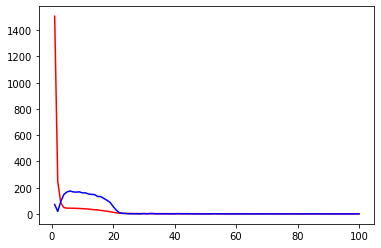

In [ ]:
tr_loss = history.history['loss']
val_loss = history.history['val_loss']
ep = list(range(1,101))
plt.plot(ep,tr_loss,color='r')
plt.plot(ep,val_loss,color='b')

In [ ]:
model.predict(X_test_sc)

array([[29.71954 ],
       [29.795204],
       [29.913649],
       [30.00442 ],
       [30.289612],
       [30.45243 ],
       [30.502684],
       [30.610018],
       [30.681866],
       [30.724665],
       [30.827076],
       [30.91192 ],
       [30.857706],
       [30.836216],
       [30.765888],
       [30.586956],
       [30.531645],
       [30.57952 ],
       [30.498362],
       [30.55208 ],
       [30.55098 ],
       [30.521479],
       [30.447777],
       [30.404919],
       [30.326199],
       [30.390844],
       [30.383293],
       [30.462788],
       [30.295288],
       [30.169695],
       [30.088388],
       [29.978638],
       [29.83427 ],
       [29.950829],
       [29.967518],
       [30.10419 ],
       [30.19788 ],
       [30.179533],
       [30.122475],
       [30.02218 ],
       [29.88971 ],
       [29.767769],
       [29.641245],
       [29.55053 ],
       [29.444567],
       [29.372942],
       [29.312428],
       [29.268267],
       [29.168371],
       [29.130064],


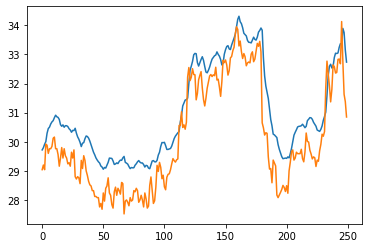

In [ ]:
plt.plot(range(len(X_test_sc)),model.predict(X_test_sc).flat)
plt.plot(range(len(X_test_sc)),y_test)

In [ ]:
X_test_sc[0].reshape(1,8,1)

array([[[-2.34092839],
        [-2.34954981],
        [-2.26086844],
        [-2.19726994],
        [-2.20673369],
        [-2.25233077],
        [-2.24936232],
        [-2.07122018]]])

In [ ]:
model.predict(X_test_sc[0].reshape(1,8,1))

array([[29.719545]], dtype=float32)

In [ ]:
y_test[1000]

29.04

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,LSTM
model2 = Sequential()
# 250 cels
model2.add(LSTM(250,input_shape=(8,1)))
model2.add(Dropout(0.3))
# single neuron
model2.add(Dense(1))
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 250)               252000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 250)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 251       
Total params: 252,251
Trainable params: 252,251
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2.compile(optimizer='adam',loss='mse')


In [ ]:
history2 = model2.fit(X_train_sc,y_train,epochs=100,validation_data=(X_test_sc,y_test))

Train on 1000 samples, validate on 250 samples
Epoch 1/100
1000/1000 [==============================] - 1s 1ms/step - loss: 1453.1891 - val_loss: 79.5781
Epoch 2/100
1000/1000 [==============================] - 1s 960us/step - loss: 331.7975 - val_loss: 3.8527
Epoch 3/100
1000/1000 [==============================] - 1s 961us/step - loss: 132.9067 - val_loss: 48.6460
Epoch 4/100
1000/1000 [==============================] - 1s 966us/step - loss: 67.8754 - val_loss: 106.9826
Epoch 5/100
1000/1000 [==============================] - 1s 979us/step - loss: 52.8359 - val_loss: 144.4759
Epoch 6/100
1000/1000 [==============================] - 1s 978us/step - loss: 47.5224 - val_loss: 162.9970
Epoch 7/100
1000/1000 [==============================] - 1s 977us/step - loss: 47.3905 - val_loss: 169.0671
Epoch 8/100
1000/1000 [==============================] - 1s 977us/step - loss: 48.6466 - val_loss: 172.7872
Epoch 9/100
1000/1000 [==============================] - 1s 963us/step - loss: 47.8051 - va

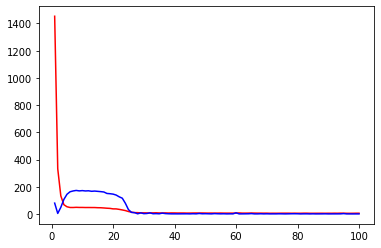

In [ ]:
tr_loss = history2.history['loss']
val_loss = history2.history['val_loss']
ep = list(range(1,101))
plt.plot(ep,tr_loss,color='r')
plt.plot(ep,val_loss,color='b')

In [ ]:
model.predict(X_test_sc)

array([[29.71954 ],
       [29.795204],
       [29.913649],
       [30.00442 ],
       [30.289612],
       [30.45243 ],
       [30.502684],
       [30.610018],
       [30.681866],
       [30.724665],
       [30.827076],
       [30.91192 ],
       [30.857706],
       [30.836216],
       [30.765888],
       [30.586956],
       [30.531645],
       [30.57952 ],
       [30.498362],
       [30.55208 ],
       [30.55098 ],
       [30.521479],
       [30.447777],
       [30.404919],
       [30.326199],
       [30.390844],
       [30.383293],
       [30.462788],
       [30.295288],
       [30.169695],
       [30.088388],
       [29.978638],
       [29.83427 ],
       [29.950829],
       [29.967518],
       [30.10419 ],
       [30.19788 ],
       [30.179533],
       [30.122475],
       [30.02218 ],
       [29.88971 ],
       [29.767769],
       [29.641245],
       [29.55053 ],
       [29.444567],
       [29.372942],
       [29.312428],
       [29.268267],
       [29.168371],
       [29.130064],


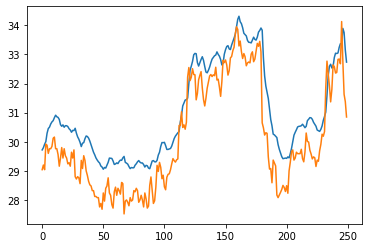

In [ ]:
plt.plot(range(len(X_test_sc)),model.predict(X_test_sc).flat)
plt.plot(range(len(X_test_sc)),y_test)

In [ ]:

X_test_sc[0].reshape(1,8,1)

array([[[-2.34092839],
        [-2.34954981],
        [-2.26086844],
        [-2.19726994],
        [-2.20673369],
        [-2.25233077],
        [-2.24936232],
        [-2.07122018]]])

In [ ]:
model.predict(X_test_sc[0].reshape(1,8,1))

array([[29.719545]], dtype=float32)

In [ ]:
y_test[1000]

29.04